In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score

In [243]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

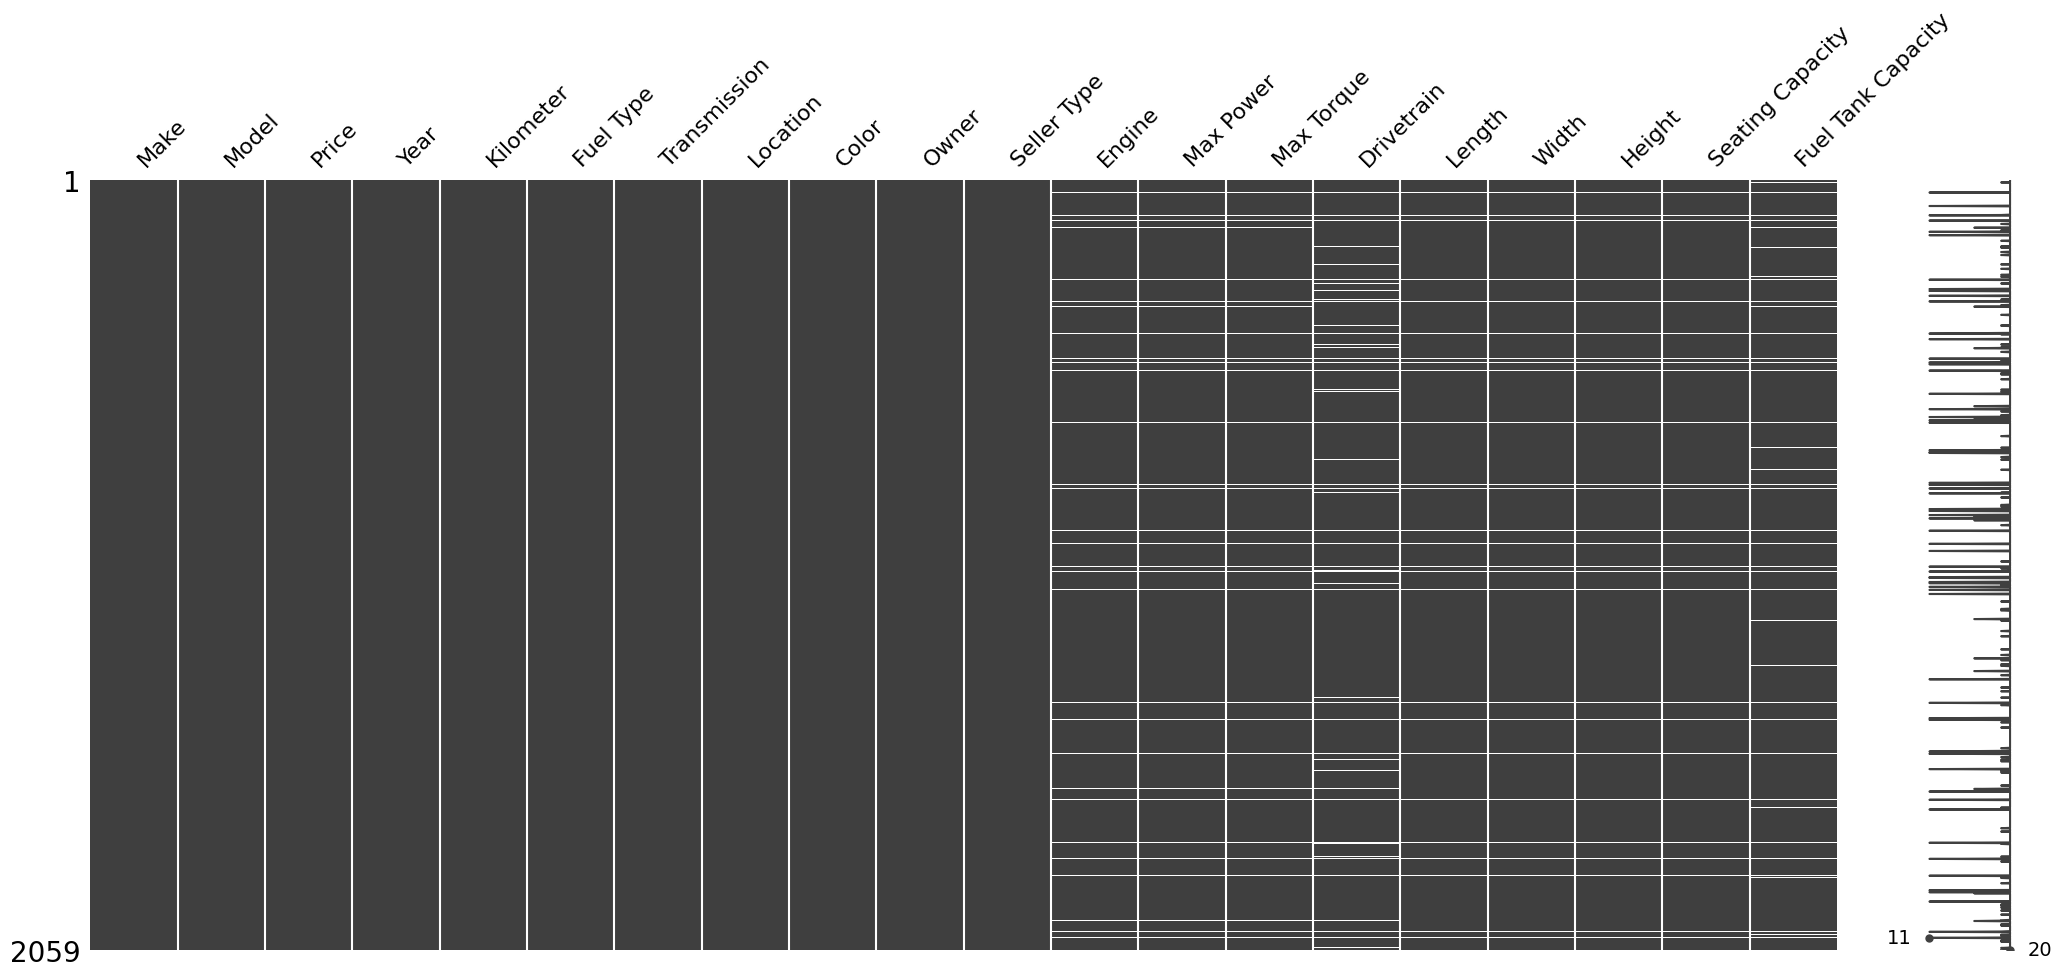

In [244]:
msno.matrix(full_df)

In [245]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [246]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [247]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 1807 to 1620
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1586 non-null   object 
 12  Max Power           1586 non-null   object 
 13  Max Torque          1586 non-null   object 
 14  Drivetrain          1538 non-null   object 
 15  Length              1599 non-null   float64
 16  Width   

In [248]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 697 to 1166
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              393 non-null    object 
 12  Max Power           393 non-null    object 
 13  Max Torque          393 non-null    object 
 14  Drivetrain          385 non-null    object 
 15  Length              396 non-null    float64
 16  Width     

In [249]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1807,Maruti Suzuki,Swift DZire VDI,351000,2013,42000,Diesel,Manual,Patna,White,First,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
1815,Audi,A4 35 TDI Premium Sunroof,1525000,2015,49000,Diesel,Automatic,Mohali,Silver,First,Individual,1968 cc,177 bhp @ 4200 rpm,380 Nm @ 1750 rpm,FWD,4701.0,1826.0,1427.0,5.0,63.0
1873,Toyota,Innova 2.5 GX BS IV 8 STR,899000,2015,125000,Diesel,Manual,Mumbai,Silver,Third,Individual,2494 cc,101 bhp @ 3600 rpm,200 Nm @ 1200 rpm,RWD,4585.0,1765.0,1760.0,8.0,55.0
1400,Skoda,Superb L&K TSI AT,2350000,2018,14120,Petrol,Automatic,Pune,Brown,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4861.0,1864.0,1483.0,5.0,66.0
514,Hyundai,Elite i20 Sportz 1.2 MT,775000,2020,39000,Petrol,Manual,Mumbai,White,First,Individual,1197 cc,82 bhp @ 6000 rpm,115 Nm @ 4200 rpm,FWD,3995.0,1775.0,1505.0,5.0,37.0


In [250]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
697,Maruti Suzuki,Ertiga VDI SHVS,725000,2017,42000,Diesel,Manual,Delhi,White,First,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,4296.0,1695.0,1685.0,7.0,45.0
134,BMW,5-Series 520d Sedan,1490000,2013,195000,Diesel,Automatic,Hyderabad,White,First,Individual,1995 cc,184 bhp @ 4000 rpm,380 Nm @ 1750 rpm,RWD,4899.0,2094.0,1464.0,5.0,NaN
1341,Honda,Jazz V Diesel,525000,2015,68244,Diesel,Manual,Indore,Silver,Second,Individual,1498 cc,98 bhp @ 3600 rpm,200 Nm @ 1750 rpm,FWD,3955.0,1694.0,1544.0,5.0,40.0
382,Hyundai,Xcent E Plus CRDi,445000,2018,65555,Diesel,Manual,Varanasi,White,Second,Individual,1186 cc,74 bhp @ 4000 rpm,190 Nm @ 1750 rpm,FWD,3995.0,1660.0,1520.0,5.0,43.0
1466,Audi,A6 35 TFSI Matrix,2850000,2017,58000,Petrol,Automatic,Delhi,Black,First,Individual,1798 cc,190 bhp @ 4200 rpm,320 Nm @ 1400 rpm,FWD,4933.0,1874.0,1455.0,5.0,75.0


In [251]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))+" cc"
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)

In [252]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [253]:
train_df = train_df.dropna()

<Axes: >

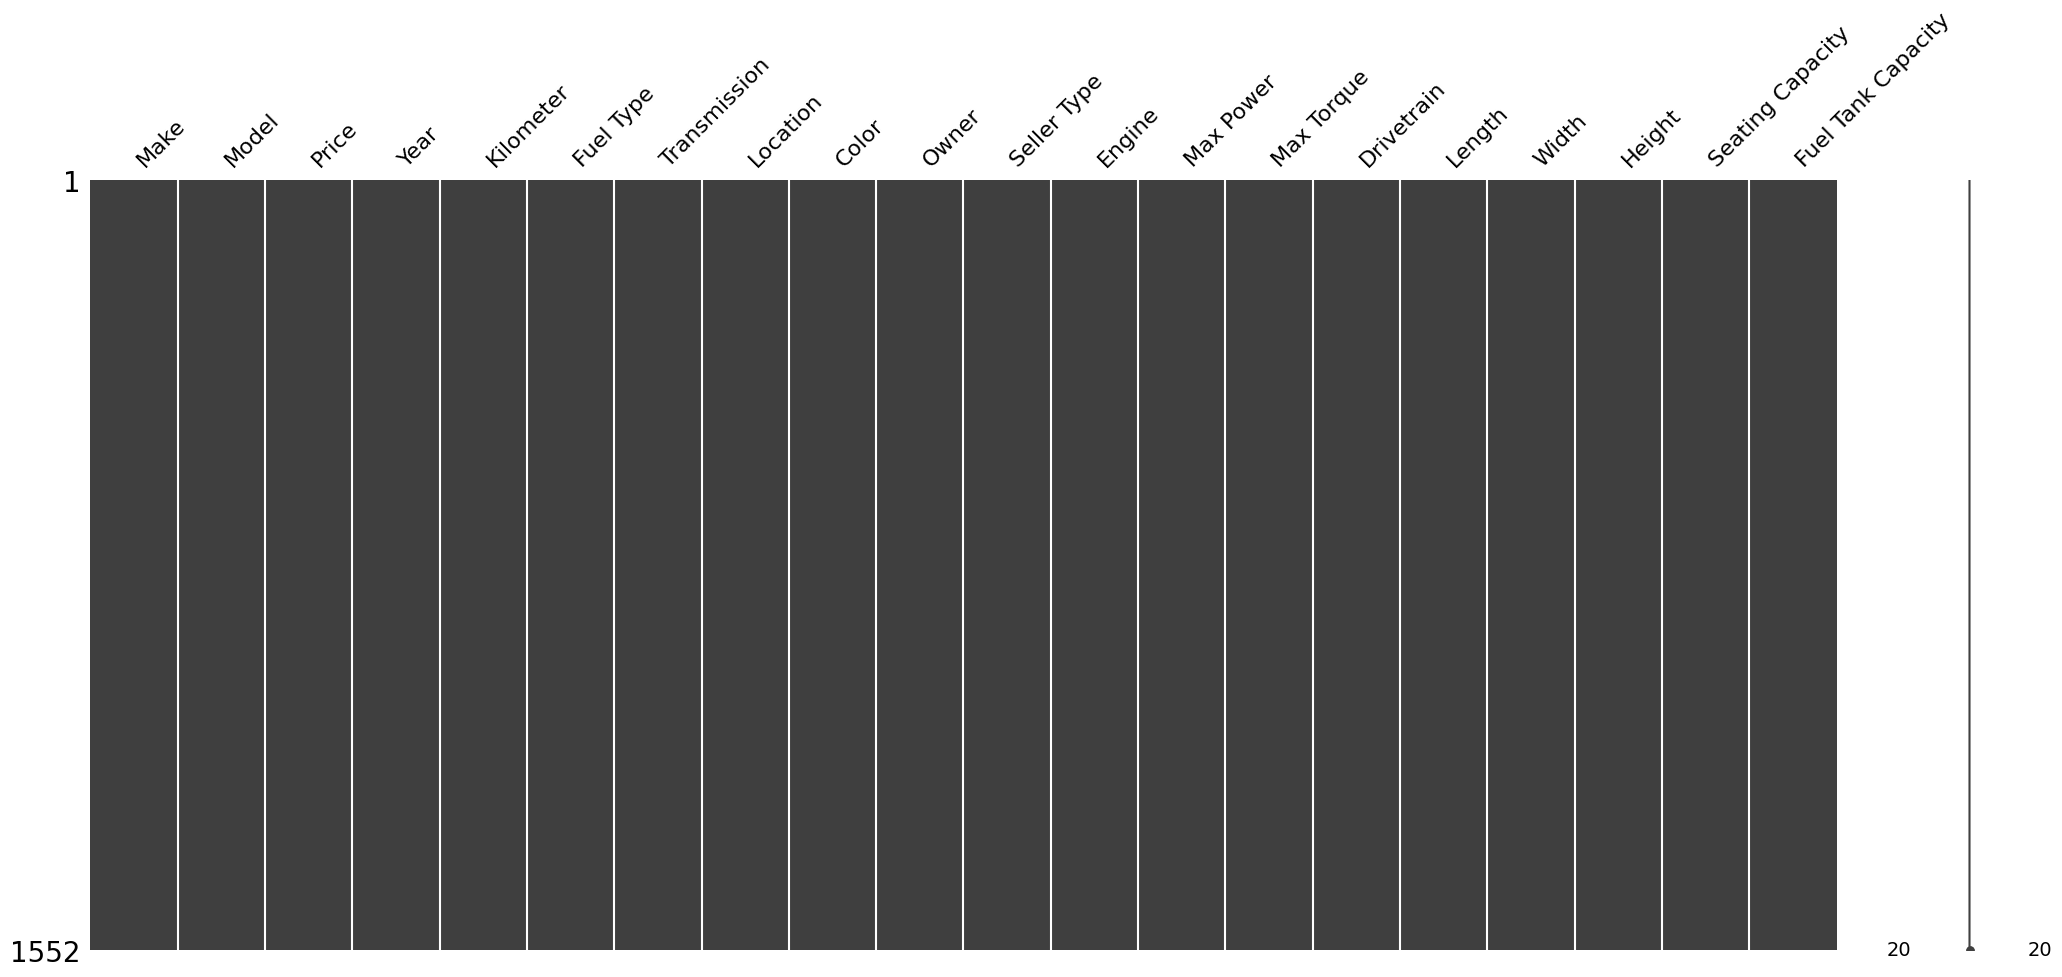

In [254]:
msno.matrix(train_df)

In [255]:
def one_hot_encode(df, columns): #unused, but valid for explanation
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [256]:
train_df = pd.get_dummies(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])

In [257]:
train_df.head()

Model    Price  Year  Kilometer   Engine  \
Make                                                                            
Audi 1815        A4 35 TDI Premium Sunroof  1525000  2015      49000  1968 cc   
     643             Q7 Technology 55 TFSI  9400000  2022       4500  2995 cc   
     555   Q3 2.0 TDI quattro Premium Plus  1513000  2015      79000  1968 cc   
     711            A3 35 TDI Premium Plus  2590000  2020      36978  1968 cc   
     1485        Q7 45 TDI Technology Pack  5200000  2017      45000  2967 cc   

                    Max Power         Max Torque  Length   Width  Height  ...  \
Make                                                                      ...   
Audi 1815  177 bhp @ 4200 rpm  380 Nm @ 1750 rpm  4701.0  1826.0  1427.0  ...   
     643   335 bhp @ 5200 rpm  500 Nm @ 1370 rpm  5064.0  1970.0  1703.0  ...   
     555   174 bhp @ 4200 rpm  380 Nm @ 1750 rpm  4385.0  1831.0  1608.0  ...   
     711   141 bhp @ 3500 rpm  320 Nm @ 1750 rpm  4456.0  1796.0  1416.0  ...   
     1485  245 bhp @ 2910 rpm  600 Nm @ 1500 rpm  5052.0  1968.0  1740.0  ...   

           Owner_Fourth  Owner_Second  Owner_Third  Owner_UnRegistered Car  \
Make                                                                         
Audi 1815         False         False        False                   False   
     643          False         False        False                   False   
     555          False          True        False                   False   
     711          False          True        False                   False   
     1485         False          True        False                   False   

           Seller Type_Commercial Registration  Seller Type_Corporate  \
Make                                                                    
Audi 1815                                False                  False   
     643                                 False                  False   
     555                                 False                  False   
     711                                 False                  False   
     1485                                False                  False   

           Seller Type_Individual  Drivetrain_AWD  Drivetrain_FWD  \
Make                                                                
Audi 1815                    True           False            True   
     643                     True            True           False   
     555                     True            True           False   
     711                     True           False            True   
     1485                    True            True           False   

           Drivetrain_RWD  
Make                       
Audi 1815           False  
     643            False  
     555            False  
     711            False  
     1485           False  

[5 rows x 155 columns]

In [258]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [259]:
train_df.head()

Model    Price  Year  Kilometer   Engine  \
Make                                                                            
Audi 1815        A4 35 TDI Premium Sunroof  1525000    10      49000  1968 cc   
     643             Q7 Technology 55 TFSI  9400000    17       4500  2995 cc   
     555   Q3 2.0 TDI quattro Premium Plus  1513000    10      79000  1968 cc   
     711            A3 35 TDI Premium Plus  2590000    15      36978  1968 cc   
     1485        Q7 45 TDI Technology Pack  5200000    12      45000  2967 cc   

                    Max Power         Max Torque  Length   Width  Height  ...  \
Make                                                                      ...   
Audi 1815  177 bhp @ 4200 rpm  380 Nm @ 1750 rpm  4701.0  1826.0  1427.0  ...   
     643   335 bhp @ 5200 rpm  500 Nm @ 1370 rpm  5064.0  1970.0  1703.0  ...   
     555   174 bhp @ 4200 rpm  380 Nm @ 1750 rpm  4385.0  1831.0  1608.0  ...   
     711   141 bhp @ 3500 rpm  320 Nm @ 1750 rpm  4456.0  1796.0  1416.0  ...   
     1485  245 bhp @ 2910 rpm  600 Nm @ 1500 rpm  5052.0  1968.0  1740.0  ...   

           Owner_Fourth  Owner_Second  Owner_Third  Owner_UnRegistered Car  \
Make                                                                         
Audi 1815         False         False        False                   False   
     643          False         False        False                   False   
     555          False          True        False                   False   
     711          False          True        False                   False   
     1485         False          True        False                   False   

           Seller Type_Commercial Registration  Seller Type_Corporate  \
Make                                                                    
Audi 1815                                False                  False   
     643                                 False                  False   
     555                                 False                  False   
     711                                 False                  False   
     1485                                False                  False   

           Seller Type_Individual  Drivetrain_AWD  Drivetrain_FWD  \
Make                                                                
Audi 1815                    True           False            True   
     643                     True            True           False   
     555                     True            True           False   
     711                     True           False            True   
     1485                    True            True           False   

           Drivetrain_RWD  
Make                       
Audi 1815           False  
     643            False  
     555            False  
     711            False  
     1485           False  

[5 rows x 155 columns]

In [260]:
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

In [261]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

scaler = preprocessing.MinMaxScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

In [262]:
train_df.head()

Model     Price  Year  Kilometer  \
Make                                                                    
Audi 1815        A4 35 TDI Premium Sunroof  0.042231    10   0.024500   
     643             Q7 Technology 55 TFSI  0.267546    17   0.002250   
     555   Q3 2.0 TDI quattro Premium Plus  0.041887    10   0.039500   
     711            A3 35 TDI Premium Plus  0.072702    15   0.018489   
     1485        Q7 45 TDI Technology Pack  0.147378    12   0.022500   

             Engine           Max Power         Max Torque    Length  \
Make                                                                   
Audi 1815  0.225201  177 bhp @ 4200 rpm  380 Nm @ 1750 rpm  0.677952   
     643   0.397286  335 bhp @ 5200 rpm  500 Nm @ 1370 rpm  0.831570   
     555   0.225201  174 bhp @ 4200 rpm  380 Nm @ 1750 rpm  0.544223   
     711   0.225201  141 bhp @ 3500 rpm  320 Nm @ 1750 rpm  0.574270   
     1485  0.392594  245 bhp @ 2910 rpm  600 Nm @ 1500 rpm  0.826492   

              Width    Height  ...  Owner_Fourth  Owner_Second  Owner_Third  \
Make                           ...                                            
Audi 1815  0.471141  0.273657  ...         False         False        False   
     643   0.664430  0.626598  ...         False         False        False   
     555   0.477852  0.505115  ...         False          True        False   
     711   0.430872  0.259591  ...         False          True        False   
     1485  0.661745  0.673913  ...         False          True        False   

           Owner_UnRegistered Car  Seller Type_Commercial Registration  \
Make                                                                     
Audi 1815                   False                                False   
     643                    False                                False   
     555                    False                                False   
     711                    False                                False   
     1485                   False                                False   

           Seller Type_Corporate  Seller Type_Individual  Drivetrain_AWD  \
Make                                                                       
Audi 1815                  False                    True           False   
     643                   False                    True            True   
     555                   False                    True            True   
     711                   False                    True           False   
     1485                  False                    True            True   

           Drivetrain_FWD  Drivetrain_RWD  
Make                                       
Audi 1815            True           False  
     643            False           False  
     555            False           False  
     711             True           False  
     1485           False           False  

[5 rows x 155 columns]

In [263]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1552 entries, ('Audi', 1815) to ('Volvo', 902)
Columns: 155 entries, Model to Drivetrain_RWD
dtypes: bool(143), float64(8), int64(1), object(3)
memory usage: 445.6+ KB


In [288]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.34


In [290]:
y_adv = y
X_adv = train_df.drop(['Model', 'Max Power', 'Max Torque'], axis=1)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 1.00


In [292]:
model.score(X_test, y_test)

0.9999999999440621